# Importing data in python

In [24]:
import numpy as np
import matplotlib.pyplot as plt

## Importing flat files using numpy
### Importing .csv file:

In [25]:
digits = np.loadtxt("./7241de160a5eef073d625853383b61ed_digits.csv", delimiter=",")

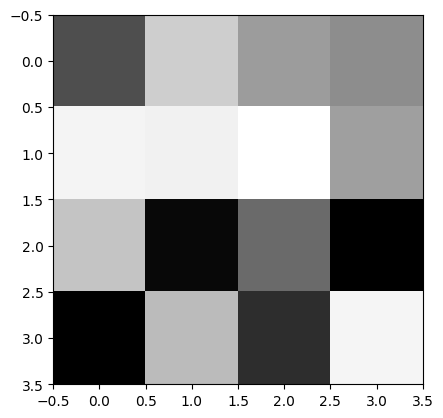

In [26]:
im = digits[21, 1:]
im_sq = np.reshape(im, (4, 4))

# Plot reshaped data (matplotlib.pyplot already loaded as plt)
plt.imshow(im_sq, cmap='Greys', interpolation='nearest')
plt.show()

In [27]:
digits

array([[ 88.,  92.,   2., ..., 100., 100.,   8.],
       [ 80., 100.,  18., ...,  56.,  98.,   8.],
       [  0.,  94.,   9., ...,  18.,  92.,   8.],
       ...,
       [100.,  98.,  60., ...,   0.,   5.,   5.],
       [ 59.,  65.,  91., ..., 100.,   0.,   1.],
       [  0.,  78.,  29., ..., 100.,  40.,   7.]], shape=(10992, 17))

### Importing .txt file:

In [28]:
# Assign filename: file
file = 'seaslug.txt'

# Import file: data
data = np.loadtxt(file, delimiter='\t', dtype=str)

# Print the first element of data
print(data[0])

['Time' 'Percent']


## Import data with pandas
Unlike NumPy arrays, pandas DataFrames can hold columns of different data types, making them more suitable for real-world data. 
### Importing .csv files:
Pandas makes use of `.read_csv` function. Several arguments can be passed to control the datatime format, select specific columns to be imported , chunksize etc.

Common Arguments for read_csv() (and similar functions):
- `header`: Specifies the row number to be used as column names (default is 0, the first row). Set header=None if there is no header row.
- `names`: A list of column names to assign if header=None.
- `index_col`: Specifies the column(s) to use as the DataFrame index.
- `sep`: Defines the delimiter used in the file (e.g., '\t' for tab-separated).
- `na_values`: A list of strings to recognize as NaN/missing values.
- `dtype`: Specifies data types for columns.


In [29]:
import pandas as pd

In [30]:
df = pd.read_csv("./titanic_sub.csv")

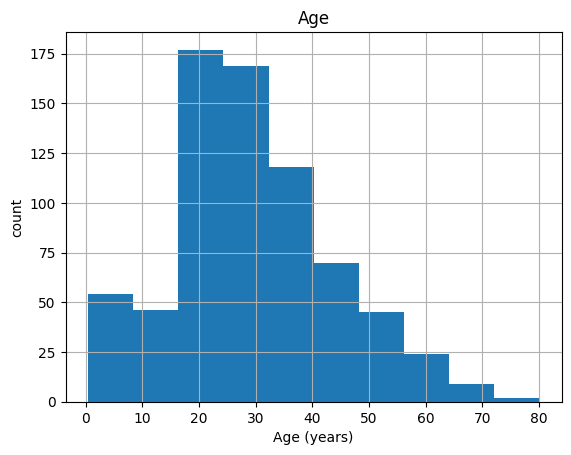

In [31]:
# Plot 'Age' variable in a histogram
pd.DataFrame.hist(df[['Age']])
plt.xlabel('Age (years)')
plt.ylabel('count')
plt.show()

## Importing non-flat files in pandas
### Importing xlsx files:

In [32]:
import openpyxl
excel_df = pd.ExcelFile("./battledeath.xlsx")

In [33]:
excel_df.sheet_names

['2002', '2004']

In [34]:
df1 = excel_df.parse(0)
df1.head()

,"War, age-adjusted mortality due to",2002
0,Afghanistan,36.083990
1,Albania,0.128908
2,Algeria,18.314120
3,Andorra,0.000000
4,Angola,18.964560


## Importing data from SAS/ Stata files
SAS files are proprietary files used by the Statistical Analysis System (SAS) software for data management, BI & advanced analytics.<br>the two most common types are `sas7bdat` and `xpt`.

Stata files are data files created and used by Stata, a statistical software package widely used for data analysis, management, and graphics. These files typically have the `.dta` extension & store datasets


In [35]:
from sas7bdat import SAS7BDAT
with SAS7BDAT("./sales.sas7bdat") as file:
    sas_df = file.to_data_frame()

print(sas_df.head())

     YEAR     P           S
0  1950.0  12.9  181.899994
1  1951.0  11.9  245.000000
2  1952.0  10.7  250.199997
3  1953.0  11.3  265.899994
4  1954.0  11.2  248.500000


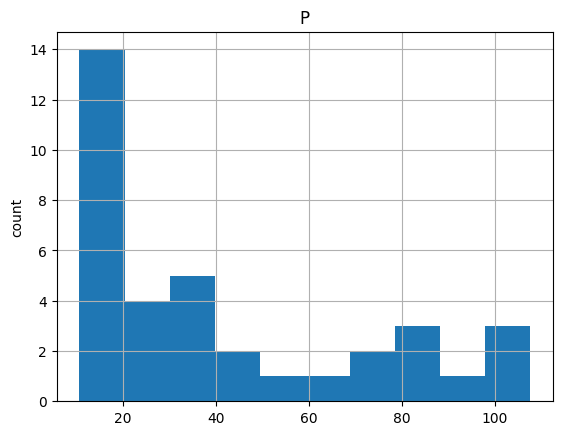

In [36]:
# Plot histogram of DataFrame features (pandas and pyplot already imported)
pd.DataFrame.hist(sas_df[['P']])
plt.ylabel('count')
plt.show()

  wbcode               country  disa1  disa2  disa3  disa4  disa5  disa6  \
0    AFG           Afghanistan   0.00   0.00   0.76   0.73    0.0   0.00   
1    AGO                Angola   0.32   0.02   0.56   0.00    0.0   0.00   
2    ALB               Albania   0.00   0.00   0.02   0.00    0.0   0.00   
3    ARE  United Arab Emirates   0.00   0.00   0.00   0.00    0.0   0.00   
4    ARG             Argentina   0.00   0.24   0.24   0.00    0.0   0.23   

   disa7  disa8  ...  disa16  disa17  disa18  disa19  disa20  disa21  disa22  \
0   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.00     0.0    0.00   
1   0.56    0.0  ...     0.0     0.4     0.0    0.61    0.00     0.0    0.99   
2   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.00     0.0    0.00   
3   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.00     0.0    0.00   
4   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.05     0.0    0.00   

   disa23  disa24  disa25  
0    0.02    0.00    0.00  
1    0

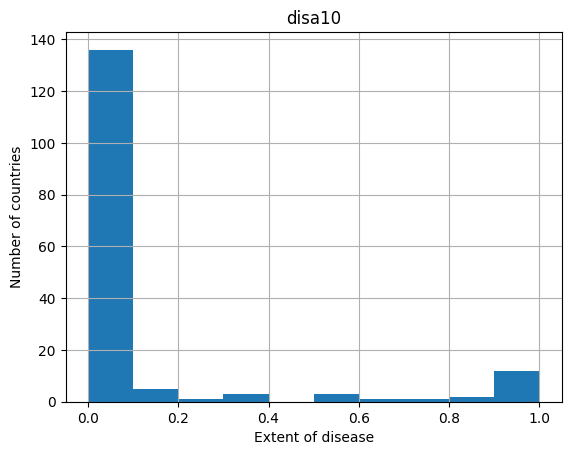

In [37]:
# Load Stata file into a pandas DataFrame: df
df = pd.read_stata('./disarea.dta')

# Print the head of the DataFrame df
print(df.head())

# Plot histogram of one column of the DataFrame
pd.DataFrame.hist(df[['disa10']])
plt.xlabel('Extent of disease')
plt.ylabel('Number of countries')
plt.show()

## Importing from HDF5 file

<image src=https://raw.githubusercontent.com/NEONScience/NEON-Data-Skills/dev-aten/graphics/HDF5-general/hdf5_structure3.jpg width=600>

HDF5 (Hierarchical Data Format version 5) is an open-source file format and data model designed for storing, organizing, and managing large, complex, and diverse scientific data. 

It uses a hierarchical, file-directory-like structure to organize data into groups and datasets, making it similar to how you'd organize files on a computer. In terms of size, HDF5 is capable of handling terabytes or even exabytes of data.

More details on [HDF5 files](https://www.youtube.com/watch?v=S74Kc8QYDac). 

In [38]:
# Import packages
import numpy as np
import h5py

# Assign filename: file
file='./L-L1_LOSC_4_V1-1126259446-32.hdf5'

# Load file: data
data = h5py.File(file, 'r')

# Print the datatype of the loaded file
print(type(data))

# Print the keys of the file
for key in data.keys():
    print(key)


<class 'h5py._hl.files.File'>
meta
quality
strain


Strain


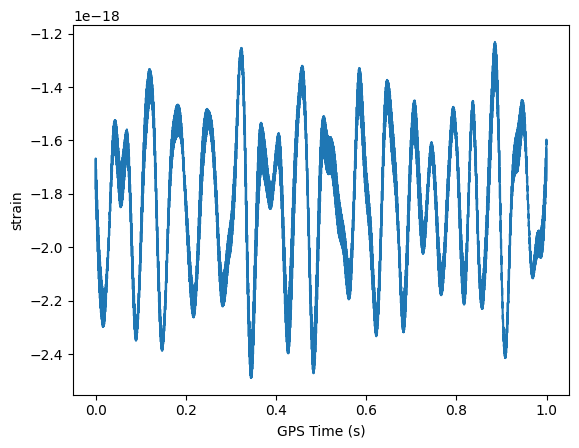

In [39]:
# Get the HDF5 group: group
group = data["strain"]

# Check out keys of group
for key in group.keys():
    print(key)

# Set variable equal to time series data: strain
strain = np.array(data["strain"]["Strain"])

# Set number of time points to sample: num_samples
num_samples = 10000

# Set time vector
time = np.arange(0, 1, 1/num_samples)

# Plot data
plt.plot(time, strain[:num_samples])
plt.xlabel('GPS Time (s)')
plt.ylabel('strain')
plt.show()


## Importing Matlab file
Uses the `scipy` library's `io` module. 

In [40]:
# Import package
import scipy.io
# Load MATLAB file: mat
mat = scipy.io.loadmat('./ja_data2.mat')

# Print the datatype type of mat
print(type(mat))

<class 'dict'>


dict_keys(['__header__', '__version__', '__globals__', 'rfpCyt', 'rfpNuc', 'cfpNuc', 'cfpCyt', 'yfpNuc', 'yfpCyt', 'CYratioCyt'])
(200, 137)


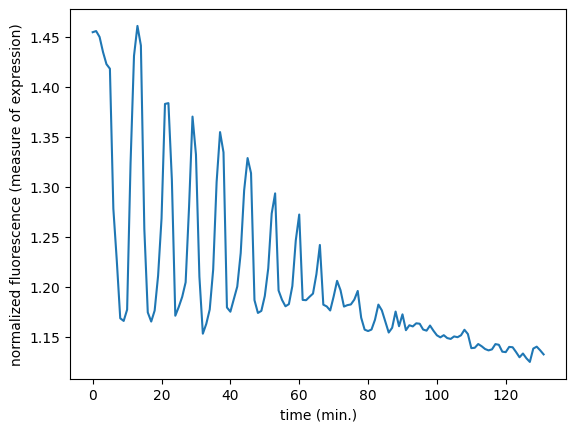

In [41]:
print(mat.keys())
print(mat['CYratioCyt'].shape)
# Subset the array and plot it
data = mat['CYratioCyt'][25, 5:]
fig = plt.figure()
plt.plot(data)
plt.xlabel('time (min.)')
plt.ylabel('normalized fluorescence (measure of expression)')
plt.show()

# Importing from relational database
A database is similar to a pandas dataframe - whereby each row is an observation & each field (column) value is an attribute of an observation.

**Primary Key** - is a unique identifier of each observation. Two or more tables are linked by one or more **Foreign Keys** i.e. column(s) present in another table(s).

<image src=https://miro.medium.com/v2/resize:fit:1400/1*_A2AE9j6-9FvAyQywu4Xlg.png width=400>

## Object Relational Mapper:
An Object-Relational Mapping (ORM) is a programming technique that acts as a bridge between object-oriented programming languages and relational databases.

An ORM such as SQLAlchemy acts as the universal layer in Python that lets you use a single, consistent API to connect to and work with many different relational database systems, including MS-SQL Server, SQLite, MySQL, and Oracle.

## Working with ORMs:
- Importing the required packages & library modules
- Create the database engine
- Connect to the db engine
- Query the database
- Save the results to a dataframe
- Close the connection



In [42]:
from sqlalchemy import create_engine , inspect, text
engine = create_engine('sqlite:///Chinook.sqlite')

In [43]:
inspect(engine).get_table_names()

['Album',
 'Artist',
 'Customer',
 'Employee',
 'Genre',
 'Invoice',
 'InvoiceLine',
 'MediaType',
 'Playlist',
 'PlaylistTrack',
 'Track']

In [63]:
# Inspect columns in a particular table
customer_table = inspect(engine).get_columns("Customer")
print(customer_table)
type(customer_table)

[{'name': 'CustomerId', 'type': INTEGER(), 'nullable': False, 'default': None, 'primary_key': 1}, {'name': 'FirstName', 'type': NVARCHAR(length=40), 'nullable': False, 'default': None, 'primary_key': 0}, {'name': 'LastName', 'type': NVARCHAR(length=20), 'nullable': False, 'default': None, 'primary_key': 0}, {'name': 'Company', 'type': NVARCHAR(length=80), 'nullable': True, 'default': None, 'primary_key': 0}, {'name': 'Address', 'type': NVARCHAR(length=70), 'nullable': True, 'default': None, 'primary_key': 0}, {'name': 'City', 'type': NVARCHAR(length=40), 'nullable': True, 'default': None, 'primary_key': 0}, {'name': 'State', 'type': NVARCHAR(length=40), 'nullable': True, 'default': None, 'primary_key': 0}, {'name': 'Country', 'type': NVARCHAR(length=40), 'nullable': True, 'default': None, 'primary_key': 0}, {'name': 'PostalCode', 'type': NVARCHAR(length=10), 'nullable': True, 'default': None, 'primary_key': 0}, {'name': 'Phone', 'type': NVARCHAR(length=24), 'nullable': True, 'default':

list

In [44]:
con = engine.connect()
results_obj = con.execute(text("SELECT * FROM Genre"))
df = pd.DataFrame(results_obj.fetchall())
con.close()

In [45]:
df.head()

,GenreId,Name
0,1,Rock
1,2,Jazz
2,3,Metal
3,4,Alternative & Punk
4,5,Rock And Roll


## Using the `with` statement
- The `with` statement ensures the connection is automatically closed when the block ends, even if an error occurs.

- `rs.fetchmany(size=10)` retrieves only the first 10 rows from the result set while `pd.DataFrame()` converts the fetched rows into a pandas DataFrame `df`. Note that `fetchmany()` returns raw row data **without column names**.

- `rs.keys()` gets the column names from the SQL result set and we assign these names as the DataFrame's column headers using `df.columns`. This is required since `fetchmany` only fetches rows without column headers.

In [64]:
# Another method:
with engine.connect() as con:
    rs = con.execute(text("SELECT * FROM Artist"))
    df = pd.DataFrame(rs.fetchmany(size=10))
    df.columns = rs.keys()

df.head()

,ArtistId,Name
0,1,AC/DC
1,2,Accept
2,3,Aerosmith
3,4,Alanis Morissette
4,5,Alice In Chains


NOTE: 

IN above code, the `rs` variable contains the table thats the reseult of the `execute` query. 

In [49]:
# Using fetchall to load all rows
with engine.connect() as con:
    rs = con.execute(text("SELECT * FROM Artist"))
    df1 = pd.DataFrame(rs.fetchall())
    df1.columns = rs.keys()

df1

,ArtistId,Name
0,1,AC/DC
1,2,Accept
2,3,Aerosmith
3,4,Alanis Morissette
4,5,Alice In Chains
...,...,...
270,271,"Mela Tenenbaum, Pro Musica Prague & Richard Kapp"
271,272,Emerson String Quartet
272,273,"C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon..."
273,274,Nash Ensemble


### Loading only specific columns to a dataframe:
Getting particular selection of columns to load into the final dataframe

In [67]:
colnames = [customer['name'] for customer in customer_table]
for i in customer_table:
    print(i["name"])

CustomerId
FirstName
LastName
Company
Address
City
State
Country
PostalCode
Phone
Fax
Email
SupportRepId


In [71]:
# Loading only specific columns into the dataframe
with engine.connect() as con:
    rs = con.execute(text("SELECT CustomerId, FirstName, LastName, Company from Customer"))
    df3 = pd.DataFrame(rs.fetchmany(size=10))
    df3.columns = rs.keys()

df3.head()


,CustomerId,FirstName,LastName,Company
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.
1,2,Leonie,Köhler,None
2,3,François,Tremblay,None
3,4,Bjørn,Hansen,None
4,5,František,Wichterlová,JetBrains s.r.o.


# Using pandas for direct SQL querying

The `pandas.read_sql_query()` function in the Pandas library is used to execute a SQL query & load the results directly into a Pandas DataFrame. It is a specialized function within the broader `pandas.read_sql()` family, specifically designed for executing SQL query strings.

Details on [`pandas.read_sql()`](https://pandas.pydata.org/docs/reference/api/pandas.read_sql_query.html#pandas.read_sql_query) | 
[`pandas.reqd_sql_query()`](https://pandas.pydata.org/docs/reference/api/pandas.read_sql.html#pandas.read_sql)


In [93]:
# Read first 10 Customers from the Customers table with Company details available
df = pd.read_sql_query('SELECT CustomerId, FirstName, LastName, Company from Customer LIMIT 10', engine)
df.head()

,CustomerId,FirstName,LastName,Company
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.
1,2,Leonie,Köhler,None
2,3,François,Tremblay,None
3,4,Bjørn,Hansen,None
4,5,František,Wichterlová,JetBrains s.r.o.


In [95]:
# Showing same output attained by both methods -- 
# by using WITH keyword OR by direct querying in pandas
df3.equals(df)

True

In [98]:
pd.read_sql_table('Album',con=engine)

,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3
...,...,...,...
342,343,Respighi:Pines of Rome,226
343,344,Schubert: The Late String Quartets & String Qu...,272
344,345,Monteverdi: L'Orfeo,273
345,346,Mozart: Chamber Music,274


## Utilizing table relationships
### Joining tables
Fetching CompanyName (from Company table) for each OrderID (in Orders table)

In [129]:
df_join = pd.read_sql_query("SELECT InvoiceId, Invoice.CustomerId, Company  FROM Invoice INNER JOIN Customer on Invoice.CustomerId=Customer.CustomerId", engine)
df_join.head()

,InvoiceId,CustomerId,Company
0,98,1,Embraer - Empresa Brasileira de Aeronáutica S.A.
1,121,1,Embraer - Empresa Brasileira de Aeronáutica S.A.
2,143,1,Embraer - Empresa Brasileira de Aeronáutica S.A.
3,195,1,Embraer - Empresa Brasileira de Aeronáutica S.A.
4,316,1,Embraer - Empresa Brasileira de Aeronáutica S.A.


In [130]:
pd.read_sql_query("SELECT * FROM Invoice WHERE CustomerId==1",engine)

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,98,1,2008-03-10 00:00:00,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,3.98
1,121,1,2008-06-12 00:00:00,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,3.96
2,143,1,2008-09-14 00:00:00,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,5.94
3,195,1,2009-05-05 00:00:00,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,0.99
4,316,1,2010-10-27 00:00:00,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,1.98
5,327,1,2010-12-07 00:00:00,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,13.86
6,382,1,2011-08-07 00:00:00,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,8.91


In [131]:
pd.read_sql_query('SELECT * FROM Customer WHERE CustomerId==1', engine)

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3


In [108]:
inspect(engine).get_table_names()

['Album',
 'Artist',
 'Customer',
 'Employee',
 'Genre',
 'Invoice',
 'InvoiceLine',
 'MediaType',
 'Playlist',
 'PlaylistTrack',
 'Track']

In [113]:
# Printing Invoice column names-- 
cols = inspect(engine).get_columns("Invoice")
for i in [col['name'] for col in cols]:
    print(i)

print("\n")
# Printing Customer column names--
cols = inspect(engine).get_columns("Customer")
for i in [col['name'] for col in cols]:
    print(i)

InvoiceId
CustomerId
InvoiceDate
BillingAddress
BillingCity
BillingState
BillingCountry
BillingPostalCode
Total


CustomerId
FirstName
LastName
Company
Address
City
State
Country
PostalCode
Phone
Fax
Email
SupportRepId


In [133]:
con.close()
engine.dispose()